In [1]:
# импортирование библиотек
import pandas as pd
import numpy as np
import re
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# константы
COSTS = 'm_costs'
CLICKS = 'm_clicks'
DATE = 'created_at'
KEYS = ['created_at',
        'd_utm_source',
        'd_utm_medium',
        'd_utm_campaign',
        'd_utm_content']

# Обзор данных

In [2]:
# загрузка данных
path = '' # укажите путь к файлу данных

ads = pd.read_csv(path + 'ads.csv')
leads = pd.read_csv(path + 'leads.csv')
purchases = pd.read_csv(path + 'purchases.csv')

In [3]:
def show_review(data):
    display(data.head())
    display(data.tail())
    display(data.info())
    print(f'Количество явных дубликатов: {data.duplicated().sum()}')

In [4]:
show_review(ads)

,created_at,d_ad_account_id,d_utm_source,d_utm_medium,d_utm_campaign,d_utm_content,d_utm_term,m_clicks,m_cost
0,2022-08-08,xo-for-client-ya,yandex,cpc,48306435,8404700756,NaN,2.0,48.840
1,2022-08-08,xo-for-client-ya,yandex,cpc,48306435,8813476161,NaN,3.0,100.776
2,2022-08-08,xo-for-client-ya,yandex,cpc,48306435,8813476162,NaN,1.0,10.140
3,2022-08-08,xo-for-client-ya,yandex,cpc,48306435,8813476163,NaN,0.0,0.000
4,2022-08-08,xo-for-client-ya,yandex,cpc,48306435,8813476164,NaN,0.0,0.000


,created_at,d_ad_account_id,d_utm_source,d_utm_medium,d_utm_campaign,d_utm_content,d_utm_term,m_clicks,m_cost
8597,2022-07-10,xo-for-client-ya,yandex,cpc,48306518,8813477628,NaN,0.0,0.0
8598,2022-07-10,xo-for-client-ya,yandex,cpc,48306518,8813477629,NaN,0.0,0.0
8599,2022-07-10,xo-for-client-ya,yandex,cpc,48306518,8404708323,NaN,0.0,0.0
8600,2022-07-10,xo-for-client-ya,yandex,cpc,48306518,8404708324,NaN,0.0,0.0
8601,2022-07-10,xo-for-client-ya,yandex,cpc,48306518,8813477631,NaN,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8602 entries, 0 to 8601
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   created_at       8602 non-null   object 
 1   d_ad_account_id  8602 non-null   object 
 2   d_utm_source     8602 non-null   object 
 3   d_utm_medium     8602 non-null   object 
 4   d_utm_campaign   8602 non-null   int64  
 5   d_utm_content    8602 non-null   int64  
 6   d_utm_term       0 non-null      float64
 7   m_clicks         8602 non-null   float64
 8   m_cost           8602 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 605.0+ KB


None

Количество явных дубликатов: 0


In [5]:
show_review(leads)

,lead_created_at,lead_id,d_lead_utm_source,d_lead_utm_medium,d_lead_utm_campaign,d_lead_utm_content,d_lead_utm_term,client_id
0,2022-10-16,d8c4a9e8-4d4a-11ed-907e-848f69e142cf,NaN,NaN,NaN,NaN,NaN,d8c4a9e9-4d4a-11ed-907e-848f69e142cf
1,2022-10-16,c48f9767-4d4a-11ed-907e-848f69e142cf,NaN,NaN,NaN,NaN,NaN,c48f9768-4d4a-11ed-907e-848f69e142cf
2,2022-10-16,d74ac455-4d49-11ed-907e-848f69e142cf,vkontakte,social,kartasetevaya,NaN,NaN,f64c97d5-31ff-11ea-abeb-c412f533dba1
3,2022-10-16,0f69e77d-4d46-11ed-907e-848f69e142cf,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-10-16,620ee1eb-4d45-11ed-907e-848f69e142cf,ycard,social,all,NaN,NaN,NaN


,lead_created_at,lead_id,d_lead_utm_source,d_lead_utm_medium,d_lead_utm_campaign,d_lead_utm_content,d_lead_utm_term,client_id
23535,2022-09-07,793a94f2-2e88-11ed-907b-848f69e142cf,NaN,NaN,NaN,NaN,NaN,793a94f3-2e88-11ed-907b-848f69e142cf
23536,2022-09-07,56bb2186-2e86-11ed-907b-848f69e142cf,sms,email,0509_01,NaN,NaN,09098204-53c3-11ea-abeb-c412f533dba1
23537,2022-10-16,c045f5aa-4d5e-11ed-907e-848f69e142cf,NaN,NaN,NaN,NaN,NaN,d0f407cc-4d5e-11ed-907e-848f69e142cf
23538,2022-10-16,a521de75-4d59-11ed-907e-848f69e142cf,NaN,NaN,NaN,NaN,NaN,NaN
23539,2022-10-16,818a8ae3-4d58-11ed-907e-848f69e142cf,kviz,cpc,2,NaN,NaN,9473caee-4d59-11ed-907e-848f69e142cf


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23540 entries, 0 to 23539
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   lead_created_at      23540 non-null  object
 1   lead_id              23540 non-null  object
 2   d_lead_utm_source    12331 non-null  object
 3   d_lead_utm_medium    10100 non-null  object
 4   d_lead_utm_campaign  9569 non-null   object
 5   d_lead_utm_content   3338 non-null   object
 6   d_lead_utm_term      328 non-null    object
 7   client_id            18601 non-null  object
dtypes: object(8)
memory usage: 1.4+ MB


None

Количество явных дубликатов: 0


In [6]:
show_review(purchases)

,purchase_created_at,purchase_id,client_id,m_purchase_amount
0,2022-02-21,d3198d39-6d16-40c9-bff7-aa28bd6e2991,7011bdcd-6fd8-11e7-80fc-c412f533dba1,9950.0
1,2022-02-21,48a0ad24-77aa-4064-a971-dd0d6f1f6c50,a2771bb0-6fd6-11e7-80fc-c412f533dba1,8700.0
2,2022-02-21,267ff20f-a56c-480a-b2f7-1f7b1a746f9f,2687f503-6fd7-11e7-80fc-c412f533dba1,0.0
3,2022-02-21,19fba5f0-785d-45bd-903a-34ba529c6404,01122a97-45bc-11eb-ac23-c412f533dba1,8700.0
4,2022-02-21,00ac921d-32e3-4200-9435-a46d5fef4a29,a55b8c4e-d5a3-11e9-abbe-c412f533dba1,500.0


,purchase_created_at,purchase_id,client_id,m_purchase_amount
66175,2022-02-19,8c1cdf21-2c6a-4ae0-8de4-8c86b6a217a5,d1f7b6d1-644f-11ea-abf3-c412f533dba1,110.0
66176,2022-02-19,161adaa3-419d-4c9e-bbab-ad9d32caaf0c,41ec1281-8232-11eb-ac27-c412f533dba1,119.0
66177,2022-08-31,db2b1f43-9963-44a4-b81f-a35d086250fa,85b0f39c-0c60-11eb-ac1a-c412f533dba1,9450.0
66178,2022-08-31,35cd2dd2-dc7c-4245-a28d-de3c352aef7e,b04dc805-0e32-11ec-9043-848f69e142cf,6495.0
66179,2022-08-31,92d9e347-bed4-42f4-8240-729d50e26073,f1e3a10b-1540-11eb-ac1d-c412f533dba1,12150.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66180 entries, 0 to 66179
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   purchase_created_at  66180 non-null  object 
 1   purchase_id          66180 non-null  object 
 2   client_id            66179 non-null  object 
 3   m_purchase_amount    66180 non-null  float64
dtypes: float64(1), object(3)
memory usage: 2.0+ MB


None

Количество явных дубликатов: 0


Описание данных:

1. **`ads` (рекламные объявления)**:
    - `created_at` - дата рекламного объявления
    - `d_ad_account_id` - id рекламного объявления
    - `d_utm_source` - utm метка
    - `d_utm_medium` - utm метка
    - `d_utm_campaign` - utm метка
    - `d_utm_content` - utm метка
    - `d_utm_term` - utm метка
    - `m_clicks` - количество кликов (общее / среднее ?)
    - `m_cost` - стоимость (общее / среднее ?)

2. **`leads` (лиды)**:
    - `lead_created_at` - дата создания лида
    - `lead_id` - id лида
    - `d_lead_utm_source` - utm метка
    - `d_lead_utm_medium` - utm метка
    - `d_lead_utm_campaign` - utm метка
    - `d_lead_utm_content` - utm метка
    - `d_lead_utm_term` - utm метка
    - `client_id` - id клиента

3. **`purchases` (покупки)**:
    - `purchase_created_at` - дата покупки
    - `purchase_id` - id покупки
    - `client_id` - id клиента
    - `m_purchase_amount` - стоимость покупки

In [7]:
display(ads.created_at.min())
ads.created_at.max()

'2022-01-03'

'2022-09-14'

In [8]:
display(leads.lead_created_at.min())
leads.lead_created_at.max()

'2022-01-01'

'2022-10-16'

## Вывод

1. Данные рекламы представлены с `2022-01-03` по `2022-09-14`, при этом у части лидов дата раньше первой рекламы (2022-01-01 и 2022-01-02). Исключим данное логическое несоответствие.
2. В таблице рекламы пропущены значения `d_utm_term` - в дальнейшем можно отобрать только те лиды, для которых данных отметок также не будет, а столбец удалить в обеих таблицах. **Об особенностях получения данной метки необходимо проконсультироваться с ответственным за сбор данных специалистом.**
3. В данных содержится множество других `пропусков` - заполним их там, где это возможно.
4. Типы данных `utm меток` различаются - для последующего объединения таблиц необходимо привести их к одному типу. Также для объединения таблиц переименуем столбцы.
5. Даты в столбцах переведем в тип данных `datetime`.

# Предобработка данных

In [9]:
# обработка логических несоответствий
leads = leads[leads.lead_created_at >= ads.created_at.min()]

In [10]:
# обработка неинформативного столбца 'd_utm_term'
ads = ads.drop('d_utm_term', axis=1).reset_index(drop=True)
leads = leads[leads.d_lead_utm_term.isna()].drop('d_lead_utm_term', axis=1).reset_index(drop=True)

In [11]:
# приведение данных к одному типу
ads[['d_utm_campaign','d_utm_content']] = \
ads[['d_utm_campaign','d_utm_content']].astype(str)

In [12]:
# обработка пропущенных значений
leads = leads.fillna('unknown')
purchases.client_id = purchases.client_id.fillna('unknonw_client')

In [13]:
# перевод дат в тип 'datetime'
def change_type(data, column):
    data[column] = pd.to_datetime(data[column], format='%Y-%m-%d')
    
change_type(ads, 'created_at')
change_type(leads, 'lead_created_at')
change_type(purchases, 'purchase_created_at')

# Объединение таблиц и нахождение связи "лид - покупка"

## Объединение исходных таблиц

In [14]:
# унификация названий столбцов для объединения таблиц
for old_col in leads.columns:
    new_col = re.sub('_lead', '', old_col)
    leads = leads.rename(columns={old_col: new_col})
leads = leads.rename(columns={'lead_created_at': DATE})

In [15]:
# объединение таблиц
merge_ad_lead = ads.merge(leads,
                          how='left',
                          on=KEYS)
merge_full = merge_ad_lead.merge(purchases,
                                 how='left',
                                 on='client_id')
merge_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10055 entries, 0 to 10054
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   created_at           10055 non-null  datetime64[ns]
 1   d_ad_account_id      10055 non-null  object        
 2   d_utm_source         10055 non-null  object        
 3   d_utm_medium         10055 non-null  object        
 4   d_utm_campaign       10055 non-null  object        
 5   d_utm_content        10055 non-null  object        
 6   m_clicks             10055 non-null  float64       
 7   m_cost               10055 non-null  float64       
 8   lead_id              2531 non-null   object        
 9   client_id            2531 non-null   object        
 10  purchase_created_at  1458 non-null   datetime64[ns]
 11  purchase_id          1458 non-null   object        
 12  m_purchase_amount    1458 non-null   float64       
dtypes: datetime64[ns](2), float64(3

## Нахождение связи "лид - покупка"

In [16]:
# выделим клики, для которых нет лидов
ads_without_leads = merge_full[merge_full.lead_id.isnull()]
merge_full = merge_full.drop(ads_without_leads.index).reset_index(drop=True)
ads_without_leads = ads_without_leads.reset_index(drop=True)

In [17]:
# выделим лиды, для которых нет покупок
leads_without_purchases = merge_full[merge_full.purchase_id.isnull()]
merge_full = merge_full.drop(leads_without_purchases.index).reset_index(drop=True)
leads_without_purchases = leads_without_purchases.reset_index(drop=True)

In [18]:
# найдем такие строки, где покупка была совершена
# в течение 15 дней с момента создания заявки;
# остальные запишем в отдельную переменную
leads_with_relevant_purchases = (
    merge_full[
        ((merge_full.purchase_created_at - merge_full.created_at) / np.timedelta64(1, 'D') >= 0) & \
        ((merge_full.purchase_created_at - merge_full.created_at) / np.timedelta64(1, 'D') <= 15)
    ]
)
leads_without_relevant_purchases = merge_full.drop(leads_with_relevant_purchases.index).reset_index(drop=True)
leads_with_relevant_purchases = leads_with_relevant_purchases.reset_index(drop=True)

In [19]:
# сгруппируем лиды по покупкам
# и оставим только ближайший к покупке
leads_purchases_nearest = pd.DataFrame()
leads_purchases_other = pd.DataFrame()

for row in leads_with_relevant_purchases.index:
    
    purchase_lines = pd.DataFrame()
    diff_list = []
    true_matrix = []
    false_matrix = []
    
    # сгруппируем строки по id покупки и найдем её дату
    purchase_id = leads_with_relevant_purchases.loc[row, 'purchase_id']
    purchase_id_group = leads_with_relevant_purchases[leads_with_relevant_purchases.purchase_id == purchase_id]
    purchase_date = leads_with_relevant_purchases.loc[row, 'purchase_created_at']
    
    # найдем разницу даты создания лида и покупки;
    # запишем разницы для 'purchase_id_group' в список 'diff_list'
    for i in purchase_id_group.index:
        lead_date = purchase_id_group.loc[i, 'created_at']
        days_diff = (purchase_date - lead_date) / np.timedelta64(1, 'D')
        diff_list.append(days_diff)
    
    # создадим булеву маску, где ближайшему к покупке лиду будет присовено 'True'
    for j in range(len(diff_list)):
        true_matrix.append(diff_list[j] == min(diff_list))
        false_matrix.append(not (diff_list[j] == min(diff_list)))
        
    # распределим заявки в группе по двум таблицам
    leads_purchases_nearest = pd.concat([leads_purchases_nearest, purchase_id_group[true_matrix]])
    leads_purchases_other = pd.concat([leads_purchases_other, purchase_id_group[false_matrix]])

leads_purchases_nearest = leads_purchases_nearest.drop_duplicates().reset_index(drop=True)
leads_purchases_other = leads_purchases_other.drop_duplicates().reset_index(drop=True)

# Создание таблиц кликов, лидов и релевантных покупок

In [20]:
# таблица кликов без лидов и покупок
show_review(ads_without_leads)

,created_at,d_ad_account_id,d_utm_source,d_utm_medium,d_utm_campaign,d_utm_content,m_clicks,m_cost,lead_id,client_id,purchase_created_at,purchase_id,m_purchase_amount
0,2022-08-08,xo-for-client-ya,yandex,cpc,48306435,8404700756,2.0,48.840,NaN,NaN,NaT,NaN,NaN
1,2022-08-08,xo-for-client-ya,yandex,cpc,48306435,8813476161,3.0,100.776,NaN,NaN,NaT,NaN,NaN
2,2022-08-08,xo-for-client-ya,yandex,cpc,48306435,8813476162,1.0,10.140,NaN,NaN,NaT,NaN,NaN
3,2022-08-08,xo-for-client-ya,yandex,cpc,48306435,8813476163,0.0,0.000,NaN,NaN,NaT,NaN,NaN
4,2022-08-08,xo-for-client-ya,yandex,cpc,48306435,8813476164,0.0,0.000,NaN,NaN,NaT,NaN,NaN


,created_at,d_ad_account_id,d_utm_source,d_utm_medium,d_utm_campaign,d_utm_content,m_clicks,m_cost,lead_id,client_id,purchase_created_at,purchase_id,m_purchase_amount
7519,2022-07-10,xo-for-client-ya,yandex,cpc,48306518,8813477628,0.0,0.0,NaN,NaN,NaT,NaN,NaN
7520,2022-07-10,xo-for-client-ya,yandex,cpc,48306518,8813477629,0.0,0.0,NaN,NaN,NaT,NaN,NaN
7521,2022-07-10,xo-for-client-ya,yandex,cpc,48306518,8404708323,0.0,0.0,NaN,NaN,NaT,NaN,NaN
7522,2022-07-10,xo-for-client-ya,yandex,cpc,48306518,8404708324,0.0,0.0,NaN,NaN,NaT,NaN,NaN
7523,2022-07-10,xo-for-client-ya,yandex,cpc,48306518,8813477631,0.0,0.0,NaN,NaN,NaT,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7524 entries, 0 to 7523
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   created_at           7524 non-null   datetime64[ns]
 1   d_ad_account_id      7524 non-null   object        
 2   d_utm_source         7524 non-null   object        
 3   d_utm_medium         7524 non-null   object        
 4   d_utm_campaign       7524 non-null   object        
 5   d_utm_content        7524 non-null   object        
 6   m_clicks             7524 non-null   float64       
 7   m_cost               7524 non-null   float64       
 8   lead_id              0 non-null      object        
 9   client_id            0 non-null      object        
 10  purchase_created_at  0 non-null      datetime64[ns]
 11  purchase_id          0 non-null      object        
 12  m_purchase_amount    0 non-null      float64       
dtypes: datetime64[ns](2), float64(3),

None

Количество явных дубликатов: 0


In [21]:
# таблица с кликами и лидами, но без покупок
# (в течение 15 дней или ближайших к покупке)
ads_leads = (
    pd.concat([
        leads_without_purchases,
        leads_without_relevant_purchases,
        leads_purchases_other])
    .reset_index(drop=True)
)

# уберём информацию о покупках, так как они нерелевантны для данных лидов
# и не будут учитываться при подсчете покупок;
# однако лиды будут считаться как лиды без покупок
ads_leads[['purchase_created_at',
           'purchase_id', 
           'm_purchase_amount']] = None
ads_leads = ads_leads.drop_duplicates().reset_index(drop=True)

show_review(ads_leads)

,created_at,d_ad_account_id,d_utm_source,d_utm_medium,d_utm_campaign,d_utm_content,m_clicks,m_cost,lead_id,client_id,purchase_created_at,purchase_id,m_purchase_amount
0,2022-08-08,xo-for-client-ya,yandex,cpc,48306450,8404701659,15.0,496.896,d21030a6-170a-11ed-9074-848f69e142cf,unknown,None,None,None
1,2022-08-08,xo-for-client-ya,yandex,cpc,48306487,8813469519,8.0,211.476,7991bdde-16df-11ed-9074-848f69e142cf,unknown,None,None,None
2,2022-08-08,xo-for-client-ya,yandex,cpc,48306494,8813466152,19.0,403.548,bf4442e9-16c5-11ed-9074-848f69e142cf,7d29ee95-16ed-11ed-9074-848f69e142cf,None,None,None
3,2022-09-09,xo-for-client-ya,yandex,cpc,48306450,8404701659,6.0,229.788,1d6e5d57-3029-11ed-907b-848f69e142cf,c79ba48e-302c-11ed-907b-848f69e142cf,None,None,None
4,2022-09-09,xo-for-client-ya,yandex,cpc,48306450,8404701664,18.0,644.640,657dd259-3048-11ed-907b-848f69e142cf,unknown,None,None,None


,created_at,d_ad_account_id,d_utm_source,d_utm_medium,d_utm_campaign,d_utm_content,m_clicks,m_cost,lead_id,client_id,purchase_created_at,purchase_id,m_purchase_amount
1388,2022-09-05,xo-for-client-ya,yandex,cpc,48306450,8404701665,18.0,585.384,8d257112-2cfd-11ed-907b-848f69e142cf,6669f570-6fd6-11e7-80fc-c412f533dba1,None,None,None
1389,2022-09-06,xo-for-client-ya,yandex,cpc,48306450,8404701665,20.0,440.628,fcf9ade8-2e16-11ed-907b-848f69e142cf,16b60eda-2f9d-11ea-abeb-c412f533dba1,None,None,None
1390,2022-09-06,xo-for-client-ya,yandex,cpc,48306487,8813469519,10.0,181.224,0b0635be-2df1-11ed-907b-848f69e142cf,96d85c87-2df1-11ed-907b-848f69e142cf,None,None,None
1391,2022-09-08,xo-for-client-ya,yandex,cpc,48306450,8404701659,8.0,427.704,14531a1b-2ef2-11ed-907b-848f69e142cf,d7ada080-60bf-11ec-9054-848f69e142cf,None,None,None
1392,2022-07-07,xo-for-client-ya,yandex,cpc,48306435,8813476162,3.0,93.108,59d3c222-fe21-11ec-9072-848f69e142cf,a7e5d538-fe8e-11ec-9072-848f69e142cf,None,None,None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   created_at           1393 non-null   datetime64[ns]
 1   d_ad_account_id      1393 non-null   object        
 2   d_utm_source         1393 non-null   object        
 3   d_utm_medium         1393 non-null   object        
 4   d_utm_campaign       1393 non-null   object        
 5   d_utm_content        1393 non-null   object        
 6   m_clicks             1393 non-null   float64       
 7   m_cost               1393 non-null   float64       
 8   lead_id              1393 non-null   object        
 9   client_id            1393 non-null   object        
 10  purchase_created_at  0 non-null      object        
 11  purchase_id          0 non-null      object        
 12  m_purchase_amount    0 non-null      object        
dtypes: datetime64[ns](1), float64(2),

None

Количество явных дубликатов: 0


In [22]:
# таблица с кликами, лидами и покупками
show_review(leads_purchases_nearest)

,created_at,d_ad_account_id,d_utm_source,d_utm_medium,d_utm_campaign,d_utm_content,m_clicks,m_cost,lead_id,client_id,purchase_created_at,purchase_id,m_purchase_amount
0,2022-08-08,xo-for-client-ya,yandex,cpc,48306450,8404701661,5.0,124.704,8c5a5080-16f8-11ed-9074-848f69e142cf,ddb3e740-a856-11ec-905f-848f69e142cf,2022-08-08,8e090ba8-e323-4189-bb3c-d9e1483a7212,6194.0
1,2022-08-08,xo-for-client-ya,yandex,cpc,48306450,8404701665,20.0,385.896,434869a7-1704-11ed-9074-848f69e142cf,5bf7d7d7-170d-11ed-9074-848f69e142cf,2022-08-15,2217b32e-f51a-4fa7-bae2-162d3b4c1060,9495.0
2,2022-09-09,xo-for-client-ya,yandex,cpc,48306435,8813476162,3.0,88.044,fd74e1fd-2ffa-11ed-907b-848f69e142cf,5fdaa67b-2ffd-11ed-907b-848f69e142cf,2022-09-10,544a9756-2e7e-4de1-acd0-87fb340080af,5995.0
3,2022-09-09,xo-for-client-ya,yandex,cpc,48306487,8404707410,3.0,39.204,e4e83d7c-304f-11ed-907b-848f69e142cf,2f7cf8e3-9a5c-11e9-abae-c412f533dba1,2022-09-14,44bb3e7f-5672-4933-a038-f590200504d8,6000.0
4,2022-08-09,xo-for-client-ya,yandex,cpc,48306450,8404701659,16.0,549.000,1cf3fad3-17a4-11ed-9074-848f69e142cf,c74bcb97-17b1-11ed-9074-848f69e142cf,2022-08-15,39da7a49-3dbd-4dc4-b651-4bf5de2c0dcb,7300.0


,created_at,d_ad_account_id,d_utm_source,d_utm_medium,d_utm_campaign,d_utm_content,m_clicks,m_cost,lead_id,client_id,purchase_created_at,purchase_id,m_purchase_amount
503,2022-09-08,xo-for-client-ya,yandex,cpc,48306450,8404701661,8.0,202.248,cefe5d59-2f53-11ed-907b-848f69e142cf,822ca8fd-d538-11e9-abbe-c412f533dba1,2022-09-12,9863f7c7-52d2-427c-87ef-b7586d853afa,10445.0
504,2022-07-07,xo-for-client-ya,yandex,cpc,48306435,8813476162,3.0,93.108,59d3c222-fe21-11ec-9072-848f69e142cf,a7e5d538-fe8e-11ec-9072-848f69e142cf,2022-07-10,055dc1b2-f7ce-4e04-b715-7b6711db1e18,700.0
505,2022-07-07,xo-for-client-ya,yandex,cpc,48306435,8813476162,3.0,93.108,59d3c222-fe21-11ec-9072-848f69e142cf,a7e5d538-fe8e-11ec-9072-848f69e142cf,2022-07-10,8158aae8-14a2-4e35-be4d-31225a44b690,0.0
506,2022-07-07,xo-for-client-ya,yandex,cpc,48306435,8813476162,3.0,93.108,59d3c222-fe21-11ec-9072-848f69e142cf,a7e5d538-fe8e-11ec-9072-848f69e142cf,2022-07-10,afdda038-c761-4030-ab00-45b563b660a2,8495.0
507,2022-07-07,xo-for-client-ya,yandex,cpc,48306487,8404707410,5.0,146.556,752fc1f6-fded-11ec-9072-848f69e142cf,fafd9a6d-d5b0-11e9-abbe-c412f533dba1,2022-07-18,1f7b76c2-c932-4ed0-b810-282355139255,10000.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   created_at           508 non-null    datetime64[ns]
 1   d_ad_account_id      508 non-null    object        
 2   d_utm_source         508 non-null    object        
 3   d_utm_medium         508 non-null    object        
 4   d_utm_campaign       508 non-null    object        
 5   d_utm_content        508 non-null    object        
 6   m_clicks             508 non-null    float64       
 7   m_cost               508 non-null    float64       
 8   lead_id              508 non-null    object        
 9   client_id            508 non-null    object        
 10  purchase_created_at  508 non-null    datetime64[ns]
 11  purchase_id          508 non-null    object        
 12  m_purchase_amount    508 non-null    float64       
dtypes: datetime64[ns](2), float64(3), o

None

Количество явных дубликатов: 0


## Вывод

1. Данные таблиц объединены в одну: `ads` с `leads` по ключам `utm меток и дате`, полученную таблицу с `purchases` по ключу `client_id`. 
2. Общее число строк для кликов без лидов - `7524`. Суммарное количество строк для кликов с лидами, но без релевантных покупок - `1393`. Количество строк, в которых содержится вся информация для сквозной аналитики (клик, лид и релевантная им покупка), составляет `508`.
3. Для дальнейшего подсчета составим `сводную таблицу, которая будет содержать нужные значения и метрики`.

# Создание отчетной таблицы

In [23]:
merge_full = pd.concat([ads_without_leads, ads_leads, leads_purchases_nearest]).reset_index(drop=True)

In [24]:
# сделаем сводную таблицу с агрегирующими функциями
final_data = (
    pd.pivot_table(merge_full,
                   index=['created_at',
                          'd_utm_source',
                          'd_utm_medium',
                          'd_utm_campaign'],
                   values=['m_clicks',
                           'm_cost',
                           'lead_id',
                           'purchase_id',
                           'm_purchase_amount'],
                   aggfunc={'m_clicks': 'sum',
                            'm_cost': 'sum',
                            'lead_id': 'count',
                            'purchase_id': 'count',
                            'm_purchase_amount': 'sum'})
    .reset_index()
)

# изменим названия столбцов в соответствии со значениями
final_data = final_data.rename(columns={
    'm_clicks': 'clicks_total',
    'm_cost': 'cost_total',
    'lead_id': 'lead_count',
    'purchase_id': 'purchase_count',
    'm_purchase_amount': 'total_sales_revenue'
})

In [25]:
# посчитаем метрики CPL и ROAS
for row in final_data.index:
    
    if final_data.loc[row, 'lead_count'] == 0:
        final_data.loc[row, 'cpl_per_day'] = 0
    else:
        final_data.loc[row, 'cpl_per_day'] = \
        final_data.loc[row, 'cost_total'] / final_data.loc[row, 'lead_count']
        
    if final_data.loc[row, 'cost_total'] == 0:
        final_data.loc[row, 'roas_per_day_perc'] = 0
    else:
        final_data.loc[row, 'roas_per_day_perc'] = \
        (final_data.loc[row, 'total_sales_revenue'] / final_data.loc[row, 'cost_total']) * 100

show_review(final_data)

,created_at,d_utm_source,d_utm_medium,d_utm_campaign,lead_count,clicks_total,cost_total,total_sales_revenue,purchase_count,cpl_per_day,roas_per_day_perc
0,2022-01-03,yandex,cpc,48306435,0,1.0,11.952,0,0,0.000,0.000000
1,2022-01-03,yandex,cpc,48306450,1,10.0,190.128,0,0,190.128,0.000000
2,2022-01-04,yandex,cpc,48306435,0,1.0,11.364,0,0,0.000,0.000000
3,2022-01-04,yandex,cpc,48306450,3,49.0,1099.632,9990.0,3,366.544,908.485748
4,2022-01-05,yandex,cpc,48306435,0,0.0,0.000,0,0,0.000,0.000000


,created_at,d_utm_source,d_utm_medium,d_utm_campaign,lead_count,clicks_total,cost_total,total_sales_revenue,purchase_count,cpl_per_day,roas_per_day_perc
1277,2022-09-14,yandex,cpc,48306450,4,48.0,1856.208,10400.0,1,464.052,560.282037
1278,2022-09-14,yandex,cpc,48306473,0,1.0,33.444,0,0,0.000,0.000000
1279,2022-09-14,yandex,cpc,48306487,0,10.0,228.060,0,0,0.000,0.000000
1280,2022-09-14,yandex,cpc,48306494,0,0.0,0.000,0,0,0.000,0.000000
1281,2022-09-14,yandex,cpc,48306518,0,0.0,0.000,0,0,0.000,0.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1282 entries, 0 to 1281
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   created_at           1282 non-null   datetime64[ns]
 1   d_utm_source         1282 non-null   object        
 2   d_utm_medium         1282 non-null   object        
 3   d_utm_campaign       1282 non-null   object        
 4   lead_count           1282 non-null   int64         
 5   clicks_total         1282 non-null   float64       
 6   cost_total           1282 non-null   float64       
 7   total_sales_revenue  1282 non-null   object        
 8   purchase_count       1282 non-null   int64         
 9   cpl_per_day          1282 non-null   float64       
 10  roas_per_day_perc    1282 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 110.3+ KB


None

Количество явных дубликатов: 0


In [26]:
# загрузка таблицы в папку
final_data.to_excel(f'final_data-{datetime.now().date()}.xlsx')

## Тренд, сезонность, скользящее среднее

## Тренд и сезонность

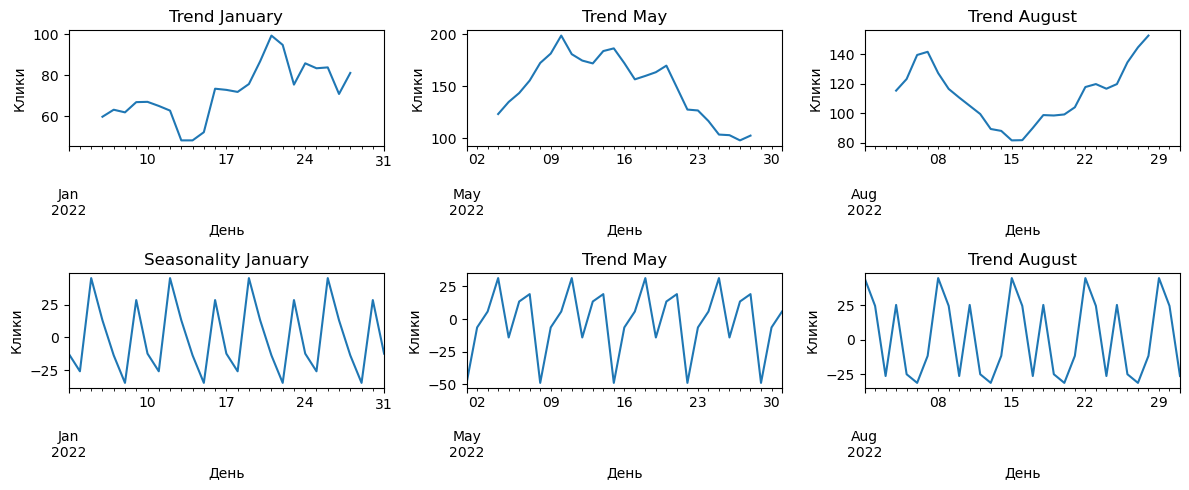

In [27]:
clicks = final_data[['clicks_total', 'created_at']].set_index('created_at')
clicks_winter = clicks['2022-01-01':'2022-01-31'].resample('1D').sum()
clicks_spring = clicks['2022-05-01':'2022-05-31'].resample('1D').sum()
clicks_summer = clicks['2022-08-01':'2022-08-31'].resample('1D').sum()
decomposed_clicks_winter = seasonal_decompose(clicks_winter)
decomposed_clicks_spring = seasonal_decompose(clicks_spring)
decomposed_clicks_summer = seasonal_decompose(clicks_summer)

plt.figure(figsize=(12, 5))

plt.subplot(231)
decomposed_clicks_winter.trend.plot(ax=plt.gca())
plt.title('Trend January')
plt.xlabel('День')
plt.ylabel('Клики')
plt.subplot(232)
decomposed_clicks_spring.trend.plot(ax=plt.gca())
plt.title('Trend May')
plt.xlabel('День')
plt.ylabel('Клики')
plt.subplot(233)
decomposed_clicks_summer.trend.plot(ax=plt.gca())
plt.title('Trend August')
plt.xlabel('День')
plt.ylabel('Клики')


plt.subplot(234)
decomposed_clicks_winter.seasonal.plot(ax=plt.gca())
plt.title('Seasonality January')
plt.xlabel('День')
plt.ylabel('Клики')
plt.subplot(235)
decomposed_clicks_spring.seasonal.plot(ax=plt.gca())
plt.title('Trend May')
plt.xlabel('День')
plt.ylabel('Клики')
plt.subplot(236)
decomposed_clicks_summer.seasonal.plot(ax=plt.gca())
plt.title('Trend August')
plt.xlabel('День')
plt.ylabel('Клики')
plt.tight_layout();

**Вывод.**

1. Тренд кликов меняется от месяца к месяцу без четкой закономерности.
2. Присутствует недельная сезонность: в зависимости от месяца выделяются 2-3 пика в течение недели (по всей видимости, есть зависимость от количества выставленных объявлений).

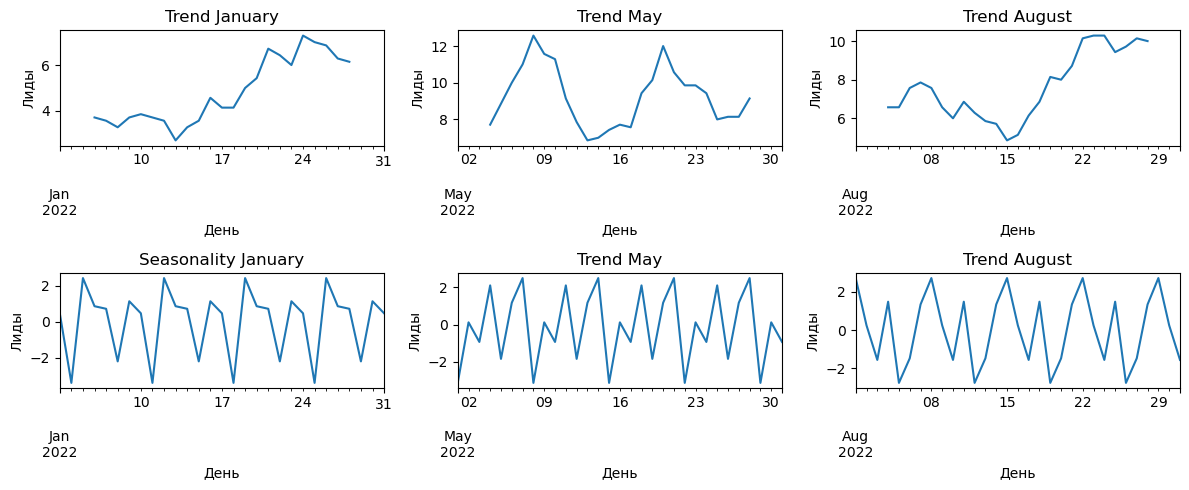

In [28]:
leads = final_data[['lead_count', 'created_at']].set_index('created_at')
leads_winter = leads['2022-01-01':'2022-01-31'].resample('1D').sum()
leads_spring = leads['2022-05-01':'2022-05-31'].resample('1D').sum()
leads_summer = leads['2022-08-01':'2022-08-31'].resample('1D').sum()
decomposed_leads_winter = seasonal_decompose(leads_winter)
decomposed_leads_spring = seasonal_decompose(leads_spring)
decomposed_leads_summer = seasonal_decompose(leads_summer)

plt.figure(figsize=(12, 5))

plt.subplot(231)
decomposed_leads_winter.trend.plot(ax=plt.gca())
plt.title('Trend January')
plt.xlabel('День')
plt.ylabel('Лиды')
plt.subplot(232)
decomposed_leads_spring.trend.plot(ax=plt.gca())
plt.title('Trend May')
plt.xlabel('День')
plt.ylabel('Лиды')
plt.subplot(233)
decomposed_leads_summer.trend.plot(ax=plt.gca())
plt.title('Trend August')
plt.xlabel('День')
plt.ylabel('Лиды')


plt.subplot(234)
decomposed_leads_winter.seasonal.plot(ax=plt.gca())
plt.title('Seasonality January')
plt.xlabel('День')
plt.ylabel('Лиды')
plt.subplot(235)
decomposed_leads_spring.seasonal.plot(ax=plt.gca())
plt.title('Trend May')
plt.xlabel('День')
plt.ylabel('Лиды')
plt.subplot(236)
decomposed_leads_summer.seasonal.plot(ax=plt.gca())
plt.title('Trend August')
plt.xlabel('День')
plt.ylabel('Лиды')
plt.tight_layout();

**Вывод.**

1. Тренд создания заявок меняется от месяца к месяцу без четкой закономерности (может совпадать с трендом кликов, а может отличаться).
2. Для заявок так же присутствует недельная сезонность: в зависимости от месяца выделяются 2-3 пика в течение недели.

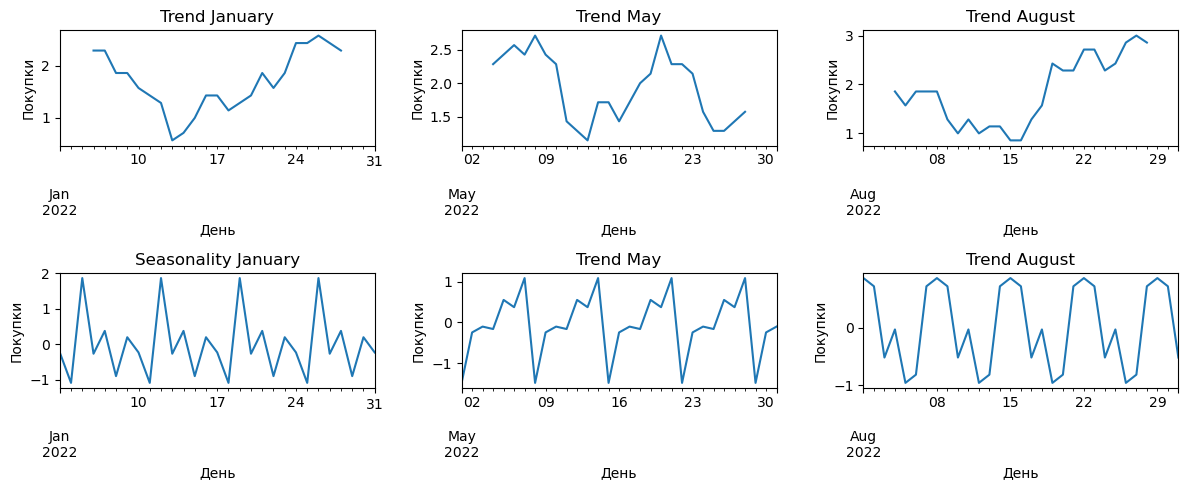

In [29]:
purchases = final_data[['purchase_count', 'created_at']].set_index('created_at')
purchases_winter = purchases['2022-01-01':'2022-01-31'].resample('1D').sum()
purchases_spring = purchases['2022-05-01':'2022-05-31'].resample('1D').sum()
purchases_summer = purchases['2022-08-01':'2022-08-31'].resample('1D').sum()
decomposed_purchases_winter = seasonal_decompose(purchases_winter)
decomposed_purchases_spring = seasonal_decompose(purchases_spring)
decomposed_purchases_summer = seasonal_decompose(purchases_summer)

plt.figure(figsize=(12, 5))

plt.subplot(231)
decomposed_purchases_winter.trend.plot(ax=plt.gca())
plt.title('Trend January')
plt.xlabel('День')
plt.ylabel('Покупки')
plt.subplot(232)
decomposed_purchases_spring.trend.plot(ax=plt.gca())
plt.title('Trend May')
plt.xlabel('День')
plt.ylabel('Покупки')
plt.subplot(233)
decomposed_purchases_summer.trend.plot(ax=plt.gca())
plt.title('Trend August')
plt.xlabel('День')
plt.ylabel('Покупки')


plt.subplot(234)
decomposed_purchases_winter.seasonal.plot(ax=plt.gca())
plt.title('Seasonality January')
plt.xlabel('День')
plt.ylabel('Покупки')
plt.subplot(235)
decomposed_purchases_spring.seasonal.plot(ax=plt.gca())
plt.title('Trend May')
plt.xlabel('День')
plt.ylabel('Покупки')
plt.subplot(236)
decomposed_purchases_summer.seasonal.plot(ax=plt.gca())
plt.title('Trend August')
plt.xlabel('День')
plt.ylabel('Покупки')
plt.tight_layout();

**Вывод.**

Для покупок прослеживается аналогичная лидам закономерность.

## Скользящее среднее

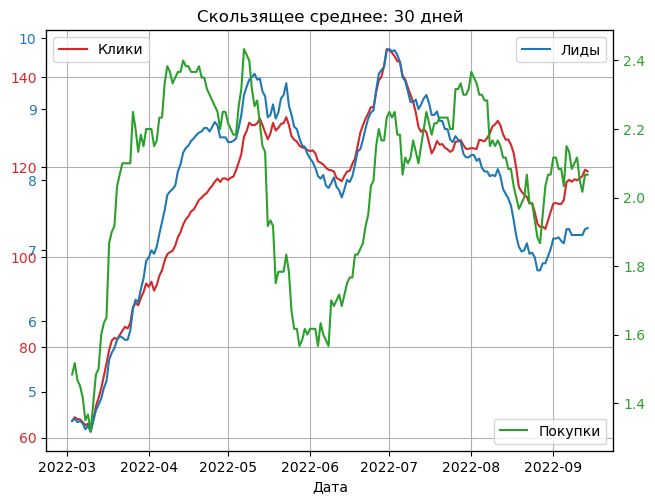

In [30]:
clicks_rolling = clicks.resample('1D').sum().rolling(60).mean()
leads_rolling = leads.resample('1D').sum().rolling(60).mean()
purchases_rolling = purchases.resample('1D').sum().rolling(60).mean()

fig, ax1 = plt.subplots()
fig.tight_layout()
plt.grid(True)
plt.title('Скользящее среднее: 30 дней')

color_click = 'tab:red'
ax1.set_xlabel('Дата')
ax1.plot(clicks_rolling, color=color_click, label='Клики')
ax1.tick_params(axis='y', labelcolor=color_click)
plt.legend(['Клики'], loc='upper left')

ax2 = ax1.twinx()

color_lead = 'tab:blue'
ax2.plot(leads_rolling, color=color_lead, label='Лиды')
ax2.tick_params(axis='y', labelcolor=color_lead)
plt.legend(['Лиды'], loc='upper right')
ax3 = ax2.twinx()

color_purchase = 'tab:green'
ax3.plot(purchases_rolling, color=color_purchase, label='Покупки')
ax3.tick_params(axis='y', labelcolor=color_purchase)
plt.legend(['Покупки'], loc='lower right')

plt.show();

**Вывод.**

1. Видно, что количество заявок четко коррелирует с количеством кликов. Суммарное число, по всей видимости, зависит от рекламных кампаний, которые проводились в разные периоды.
2. Количество покупок также часто коррелирует с другими показателями, но это правило работает не всегда. Так, в начале июня снижение было в разы больше, чем у кликов и лидов, а в июле наблюдался рост покупок несмотря на снижение кликов и заявок.
3. Данные графики говорят о том, что покупки также зависят от сезона: чаще всего салон красоты востребован в апреле и начале августа, а хуже всего - в июне и зимой-начале весны.

# Код построения пайплайна

```python
# импортирование библиотек
import pandas as pd
import numpy as np
import re
from datetime import datetime

COSTS = 'm_costs'
CLICKS = 'm_clicks'
DATE = 'created_at'
KEYS = ['created_at',
        'd_utm_source',
        'd_utm_medium',
        'd_utm_campaign',
        'd_utm_content']

# загрузка данных
path = '' # укажите путь к файлу данных

ads = pd.read_csv(path + 'ads.csv')
leads = pd.read_csv(path + 'leads.csv')
purchases = pd.read_csv(path + 'purchases.csv')

# обработка логических несоответствий
leads = leads[leads.lead_created_at >= ads.created_at.min()]

# обработка неинформативного столбца 'd_utm_term'
ads = ads.drop('d_utm_term', axis=1).reset_index(drop=True)
leads = leads[leads.d_lead_utm_term.isna()].drop('d_lead_utm_term', axis=1).reset_index(drop=True)

# приведение данных к одному типу
ads[['d_utm_campaign','d_utm_content']] = \
ads[['d_utm_campaign','d_utm_content']].astype(str)

# обработка пропущенных значений
leads = leads.fillna('unknown')
purchases.client_id = purchases.client_id.fillna('unknonw_client')

# перевод дат в тип 'datetime'
def change_type(data, column):
    data[column] = pd.to_datetime(data[column], format='%Y-%m-%d')
    
change_type(ads, 'created_at')
change_type(leads, 'lead_created_at')
change_type(purchases, 'purchase_created_at')

# унификация названий столбцов для объединения таблиц
for old_col in leads.columns:
    new_col = re.sub('_lead', '', old_col)
    leads = leads.rename(columns={old_col: new_col})
leads = leads.rename(columns={'lead_created_at': DATE})

# объединение таблиц
merge_ad_lead = ads.merge(leads,
                          how='left',
                          on=KEYS)
merge_full = merge_ad_lead.merge(purchases,
                                 how='left',
                                 on='client_id')

# выделим клики, для которых нет лидов
ads_without_leads = merge_full[merge_full.lead_id.isnull()]
merge_full = merge_full.drop(ads_without_leads.index).reset_index(drop=True)
ads_without_leads = ads_without_leads.reset_index(drop=True)

# выделим лиды, для которых нет покупок
leads_without_purchases = merge_full[merge_full.purchase_id.isnull()]
merge_full = merge_full.drop(leads_without_purchases.index).reset_index(drop=True)
leads_without_purchases = leads_without_purchases.reset_index(drop=True)

# найдем такие строки, где покупка была совершена
# в течение 15 дней с момента создания заявки;
# остальные запишем в отдельную переменную
leads_with_relevant_purchases = (
    merge_full[
        ((merge_full.purchase_created_at - merge_full.created_at) / np.timedelta64(1, 'D') >= 0) & \
        ((merge_full.purchase_created_at - merge_full.created_at) / np.timedelta64(1, 'D') <= 15)
    ]
)
leads_without_relevant_purchases = merge_full.drop(leads_with_relevant_purchases.index).reset_index(drop=True)
leads_with_relevant_purchases = leads_with_relevant_purchases.reset_index(drop=True)

# сгруппируем лиды по покупкам
# и оставим только ближайший к покупке
leads_purchases_nearest = pd.DataFrame()
leads_purchases_other = pd.DataFrame()

for row in leads_with_relevant_purchases.index:
    
    purchase_lines = pd.DataFrame()
    diff_list = []
    true_matrix = []
    false_matrix = []
    
    # сгруппируем строки по id покупки и найдем её дату
    purchase_id = leads_with_relevant_purchases.loc[row, 'purchase_id']
    purchase_id_group = leads_with_relevant_purchases[leads_with_relevant_purchases.purchase_id == purchase_id]
    purchase_date = leads_with_relevant_purchases.loc[row, 'purchase_created_at']
    
    # найдем разницу даты создания лида и покупки;
    # запишем разницы для 'purchase_id_group' в список 'diff_list'
    for i in purchase_id_group.index:
        lead_date = purchase_id_group.loc[i, 'created_at']
        days_diff = (purchase_date - lead_date) / np.timedelta64(1, 'D')
        diff_list.append(days_diff)
    
    # создадим булеву маску, где ближайшему к покупке лиду будет присовено 'True'
    for j in range(len(diff_list)):
        true_matrix.append(diff_list[j] == min(diff_list))
        false_matrix.append(not (diff_list[j] == min(diff_list)))
        
    # распределим заявки в группе по двум таблицам
    leads_purchases_nearest = pd.concat([leads_purchases_nearest, purchase_id_group[true_matrix]])
    leads_purchases_other = pd.concat([leads_purchases_other, purchase_id_group[false_matrix]])

leads_purchases_nearest = leads_purchases_nearest.drop_duplicates().reset_index(drop=True)
leads_purchases_other = leads_purchases_other.drop_duplicates().reset_index(drop=True)

# таблица с кликами и лидами, но без покупок
# (в течение 15 дней или ближайших к покупке)
ads_leads = (
    pd.concat([
        leads_without_purchases,
        leads_without_relevant_purchases,
        leads_purchases_other])
    .reset_index(drop=True)
)

# уберём информацию о покупках, так как они нерелевантны для данных лидов
# и не будут учитываться при подсчете покупок;
# однако лиды будут считаться как лиды без покупок
ads_leads[['purchase_created_at',
           'purchase_id', 
           'm_purchase_amount']] = None
ads_leads = ads_leads.drop_duplicates().reset_index(drop=True)

merge_full = pd.concat([ads_without_leads, ads_leads, leads_purchases_nearest]).reset_index(drop=True)

# сделаем сводную таблицу с агрегирующими функциями
final_data = (
    pd.pivot_table(merge_full,
                   index=['created_at',
                          'd_utm_source',
                          'd_utm_medium',
                          'd_utm_campaign'],
                   values=['m_clicks',
                           'm_cost',
                           'lead_id',
                           'purchase_id',
                           'm_purchase_amount'],
                   aggfunc={'m_clicks': 'sum',
                            'm_cost': 'sum',
                            'lead_id': 'count',
                            'purchase_id': 'count',
                            'm_purchase_amount': 'sum'})
    .reset_index()
)

# изменим названия столбцов в соответствии со значениями
final_data = final_data.rename(columns={
    'm_clicks': 'clicks_total',
    'm_cost': 'cost_total',
    'lead_id': 'lead_count',
    'purchase_id': 'purchase_count',
    'm_purchase_amount': 'total_sales_revenue'
})

# посчитаем метрики CPL и ROAS
for row in final_data.index:
    
    if final_data.loc[row, 'lead_count'] == 0:
        final_data.loc[row, 'cpl_per_day'] = 0
    else:
        final_data.loc[row, 'cpl_per_day'] = \
        final_data.loc[row, 'cost_total'] / final_data.loc[row, 'lead_count']
        
    if final_data.loc[row, 'cost_total'] == 0:
        final_data.loc[row, 'roas_per_day_perc'] = 0
    else:
        final_data.loc[row, 'roas_per_day_perc'] = \
        (final_data.loc[row, 'total_sales_revenue'] / final_data.loc[row, 'cost_total']) * 100

# загрузка таблицы в папку
final_data.to_excel(f'final_data-{datetime.now().date()}.xlsx')
```